In [1]:
# Supervised Learning
# Easist,basic algorithm
import numpy as np 
import matplotlib.pyplot as plt
import math

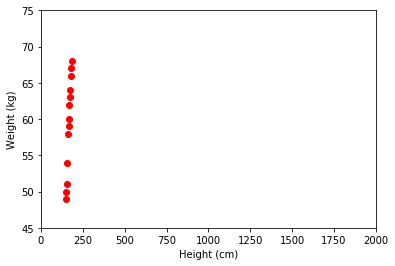

In [2]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
#X = np.array([[147, 1750, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([0, 2000, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


w =  [[-33.73541021]
 [  0.55920496]]


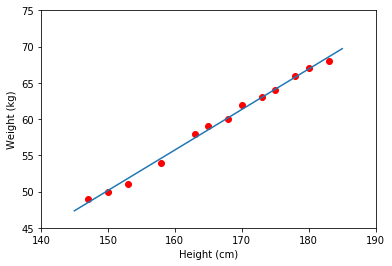

In [3]:
# w=A†b=(¯XT¯X)†¯XTy
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


In [4]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )


Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


In [5]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)


Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


In [6]:
## Create Random Example to test Linear Regression
x1 = np.arange(-5,5,dtype=np.int)
x2 = np.arange(-5,5,dtype=np.int)
x = np.zeros((2,0),dtype=np.int)
for i in x1:
    for j in x2:
        temp = np.array([[i],[j]])
        x = np.hstack((x,temp))

In [7]:
x

array([[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4,
        -4, -4, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -2, -2,
        -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4, -5, -4, -3, -2, -1,  0,
         1,  2,  3,  4, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4, -5, -4,
        -3, -2, -1,  0,  1,  2,  3,  4, -5, -4, -3, -2, -1,  0,  1,  2,
         3,  4, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4, -5, -4, -3, -2,
        -1,  0,  1,  2,  3,  4, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,
        -5, -4, -3, -2, -1,  0,  1,  2,  3,  4, -5, -4, -3, -2, -1,  0,
         1,  2,  3,  4]])

In [8]:
# Some random function, focus on the coefficient
def funct_ret(x1,x2):
    ret = 2.212*x1**2 + 5.623*x2**2 + 7*x1*x2 + 3*math.sin(x2) + 2*math.cos(x1)
    return ret
def ret_X_tilde(x1,x2):
    ret = np.array([x1**2,x2**2,x1*x2,math.sin(x2),math.cos(x1)])
    return ret

In [9]:
#Get output of real function
y = np.zeros(x.shape[1])
for i in range(y.shape[0]):
    y[i] = funct_ret(x[0,i],x[1,i])
#Get X_tilde
X_tilde = np.zeros(0)
for i in range(x.shape[1]):
    Xi_tilde = ret_X_tilde(x[0,i],x[1,i])
    X_tilde= np.append(X_tilde,Xi_tilde)
# X_tilde = [x1^2, x2^2, x1x2, sin(x2), cos(x1)]
X_tilde = X_tilde.reshape(int(X_tilde.shape[0]/5),5)

In [10]:
# w=A†b=(¯XT¯X)†¯XTy
# Building Xbar 
one = np.ones((X_tilde.shape[0], 1))
Xbar = np.concatenate((one, X_tilde), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [-2.55795385e-13  2.21200000e+00  5.62300000e+00  7.00000000e+00
  3.00000000e+00  2.00000000e+00]


In [11]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [3.4271277e-15 2.2120000e+00 5.6230000e+00 7.0000000e+00 3.0000000e+00
 2.0000000e+00]
Solution found by (5):  [-2.55795385e-13  2.21200000e+00  5.62300000e+00  7.00000000e+00
  3.00000000e+00  2.00000000e+00]
